In [1]:
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
layoff_filepath = 'layoffs.csv'
layoffdf = pd.read_csv(layoff_filepath)

## Data Exploration

In [4]:
layoffdf.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,New Work,Hamburg,Consumer,400.0,NaN,2024-01-11,Post-IPO,Germany,NaN
1,Playtika,Tel Aviv,Consumer,300.0,0.10,2024-01-11,Post-IPO,Israel,NaN
2,Discord,SF Bay Area,Consumer,170.0,0.17,2024-01-11,Series H,United States,995.0
3,Inmobi,Bengaluru,Marketing,125.0,0.05,2024-01-11,Unknown,India,320.0
4,Audible,New York City,Media,100.0,0.05,2024-01-11,Acquired,United States,14.0


In [5]:
layoffdf.shape

(3313, 9)

In [6]:
layoffdf.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2189.000000,2141.000000,2962.000000
mean,242.146185,0.277458,775.056616
std,767.384119,0.281162,4886.777257
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.000000
50%,80.000000,0.170000,163.000000
75%,180.000000,0.300000,454.500000
max,12000.000000,1.000000,121900.000000


In [7]:
columns = layoffdf.columns
columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [8]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [9]:
layoffdf.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1124
percentage_laid_off    1172
date                      0
stage                     7
country                   0
funds_raised            351
dtype: int64

In [10]:
print("Percentage of missing values:")
print(f"total_laid_off contains {round((1124 / layoffdf.shape[0]) * 100)} % missing values")
print(f"percentage_laid_off contains {round((1172 / layoffdf.shape[0]) * 100)} % missing values")
print(f"funds_raised contains {round((351 / layoffdf.shape[0]) * 100)} % missing values")

Percentage of missing values:
total_laid_off contains 34 % missing values
percentage_laid_off contains 35 % missing values
funds_raised contains 11 % missing values


In [11]:
# layoffdf['total_laid_off'].fillna(round(layoffdf['total_laid_off'].mean()), inplace=True)
# layoffdf['percentage_laid_off'].fillna(round(layoffdf['percentage_laid_off'].mean()), inplace=True)
# layoffdf['funds_raised'].fillna(round(layoffdf['funds_raised'].mean()), inplace=True)

In [12]:
layoffdf['total_laid_off'].isnull().sum()

1124

## Data Visualizatoin

### Plots for numerical feature: 'total_laid_off'

<AxesSubplot:xlabel='total_laid_off', ylabel='Count'>

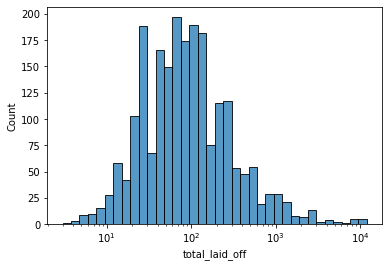

In [13]:
sns.histplot(layoffdf['total_laid_off'],log_scale=True)

In [14]:
layoffdf['total_laid_off'].value_counts()

100.0     135
30.0       95
40.0       83
50.0       75
200.0      67
         ... 
6650.0      1
325.0       1
121.0       1
525.0       1
375.0       1
Name: total_laid_off, Length: 330, dtype: int64

### Plots for numerical feature: 'percentage_laid_off'

<AxesSubplot:xlabel='percentage_laid_off', ylabel='Count'>

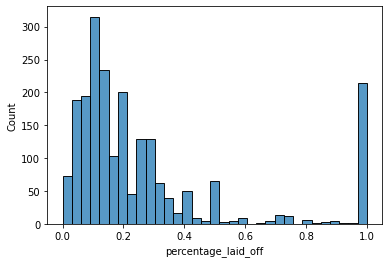

In [15]:
sns.histplot(layoffdf['percentage_laid_off'])


In [16]:
layoffdf['percentage_laid_off'].value_counts()

1.000    214
0.100    209
0.200    170
0.150    131
0.250    112
        ... 
0.035      1
0.960      1
0.920      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 77, dtype: int64

### Plots for numerical feature: 'funds_raised'

<AxesSubplot:xlabel='funds_raised', ylabel='Count'>

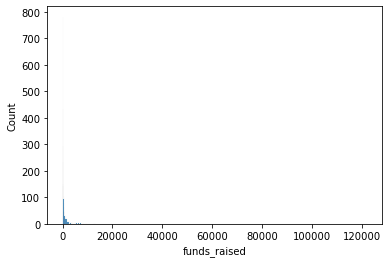

In [17]:
sns.histplot(layoffdf['funds_raised'])

In [18]:
layoffdf['funds_raised'].value_counts()

1.0       29
1300.0    29
2.0       29
50.0      26
17.0      25
          ..
672.0      1
196.0      1
483.0      1
198.0      1
5.1        1
Name: funds_raised, Length: 712, dtype: int64

In [19]:
max(layoffdf['funds_raised'])

nan

### Correlations

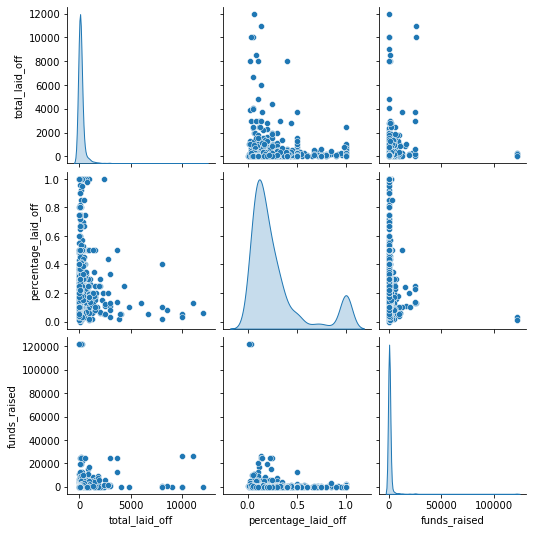

In [20]:
sns.pairplot(layoffdf, diag_kind='kde')

## Object type Data exploration

In [21]:
layoffdf.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

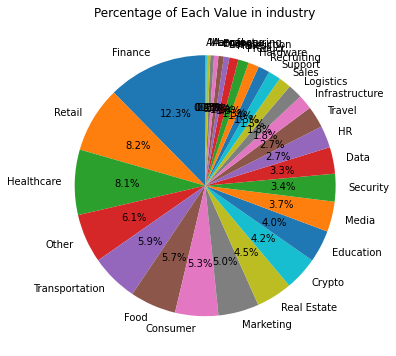

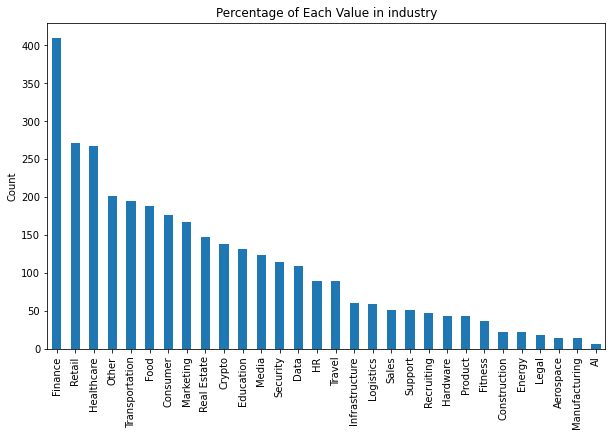

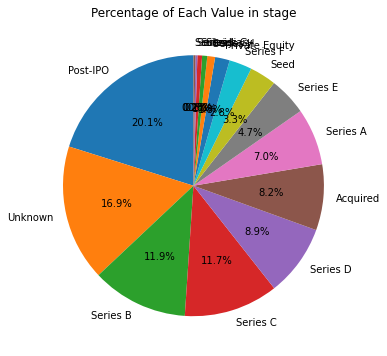

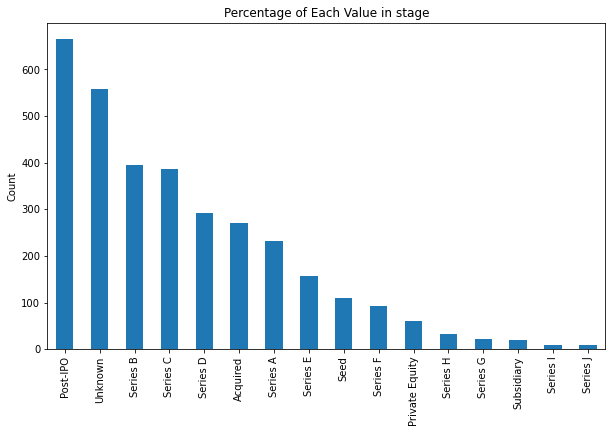

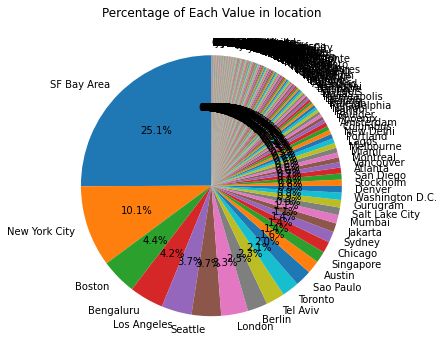

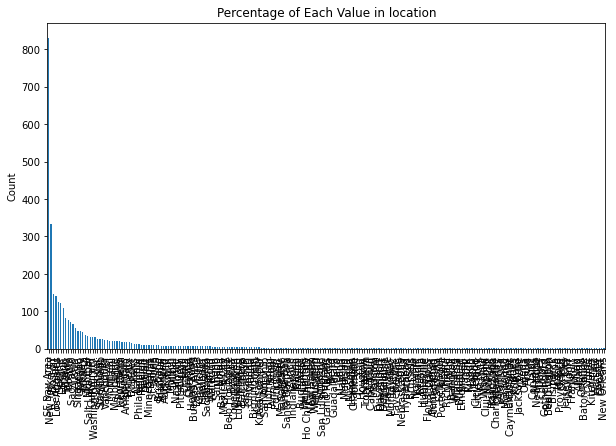

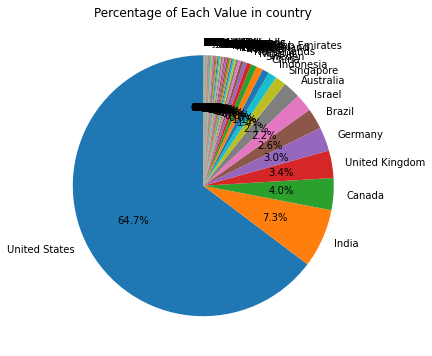

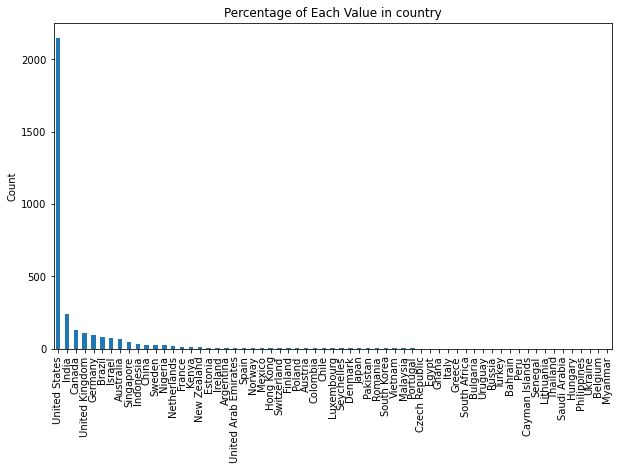

In [22]:
column_names = ['industry', 'stage','location', 'country']
for column_name in column_names:
    value_counts = layoffdf[column_name].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage of Each Value in {column_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Percentage of Each Value in {column_name}')
    plt.ylabel('Count')
    plt.show()